In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%matplotlib inline
from matplotlib import style

style.use('fivethirtyeight')

In [35]:
from datetime import datetime, timedelta
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy

from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"The most recent date in the data set is: '{most_recent_date}'")

The most recent date in the data set is: '2017-08-23'


### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [22]:
# Starting from the most recent data point in the database.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = datetime.strptime(most_recent_date, '%Y-%m-%d')
most_recent_date

datetime.datetime(2017, 8, 23, 0, 0)

In [25]:
# Calculate the date one year from the last date in data set.
date_one_year_ago = most_recent_date - timedelta(days=365)
date_one_year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [26]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_one_year_ago).all()
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [27]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
df.head()

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [28]:
# Sort the dataframe by date
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


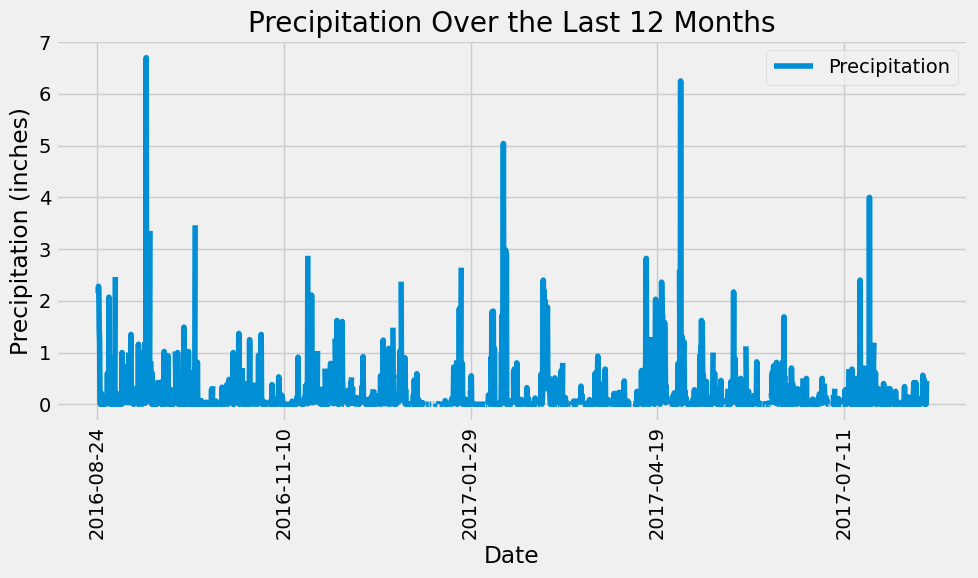

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation Over the Last 12 Months')
plt.tight_layout()
plt.show()

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = df.describe()
print(precipitation_summary)

       Precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

### Design a query to calculate the total number of stations in the dataset

In [31]:
total_stations = session.query(func.count(Station.station)).scalar()
print(f"The total number of stations in the dataset is: {total_stations}")

The total number of stations in the dataset is: 9


###  Design a query to find the most active stations (i.e. what stations have the most rows?)
###  List the stations and the counts in descending order.

In [34]:
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

pprint(most_active_stations)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [43]:
type(most_active_stations)

list

In [42]:
# Display the most active stations
for station, count in most_active_stations:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


### Which station id has the greatest number of observations?

In [44]:
# Get the station ID with the greatest number of observations
greatest_obs_station_id = most_active_stations[0][0]
greatest_obs_count = most_active_stations[0][1]

In [45]:
print(f"Station ID with the greatest number of observations: {greatest_obs_station_id}")
print(f"Number of observations: {greatest_obs_count}")

Station ID with the greatest number of observations: USC00519281
Number of observations: 2772


### Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [36]:
# Get the most active station ID
most_active_station_id = most_active_stations[0][0]

# Using the most active station ID, find the lowest, highest, and average temperature
temperature_stats = session.query(
    func.min(Measurement.tobs), 
    func.max(Measurement.tobs), 
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station_id).all()

# Display the temperature statistics
lowest_temp, highest_temp, avg_temp = temperature_stats[0]

print(f"Most active station ID: {most_active_station_id}")
print(f"Lowest temperature: {lowest_temp}")
print(f"Highest temperature: {highest_temp}")
print(f"Average temperature: {avg_temp:.2f}")

Most active station ID: USC00519281
Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66


### Using the most active station id
### Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [38]:
# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= date_one_year_ago).\
    filter(Measurement.station == most_active_station_id).all()

In [39]:
# Save the data in a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Date', 'Temperature'])

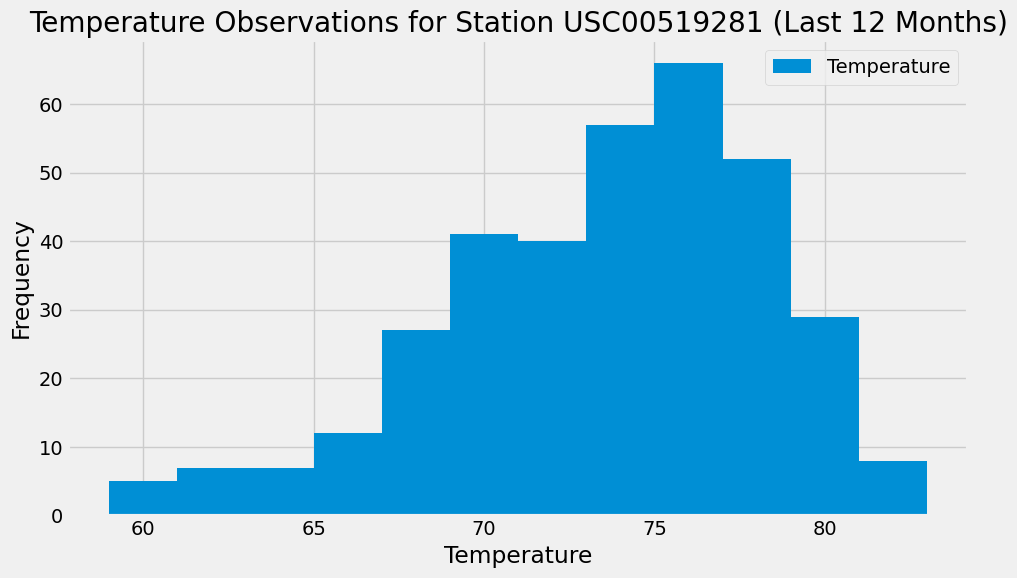

In [40]:
# Plot the data as a histogram using Matplotlib
temperature_df.plot(kind='hist', bins=12, figsize=(10,6))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station_id} (Last 12 Months)')
plt.tight_layout()
plt.show()

# Close Session

In [41]:
# Close Session
session.close()